In [32]:
import pandas as pd

# Visualizacion 
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
ipc = pd.read_excel("ipc.xlsx", parse_dates= ["Mes y año"], index_col = 'Mes y año')
ipc.head()

,Índice,Mensual,Acum. año,Acum.12 meses,Trimestre,Cuatrimestre,Semestre
Mes y año,,,,,,,
1940-01-01,4.596609e-07,-1.408451,-1.408451,5.421687,2.941176,3.550296,4.477612
1940-02-01,4.596609e-07,0.000000,-1.408451,6.382979,2.040816,2.941176,4.790419
1940-03-01,4.622876e-07,0.571429,-0.845070,7.975460,-0.845070,2.623907,4.142012
1940-04-01,4.596609e-07,-0.568182,-1.408451,2.941176,0.000000,-1.408451,2.941176
1940-05-01,4.544077e-07,-1.142857,-2.535211,1.764706,-1.142857,-1.142857,0.874636


# Graficos basicos

<Axes: xlabel='Mes y año'>

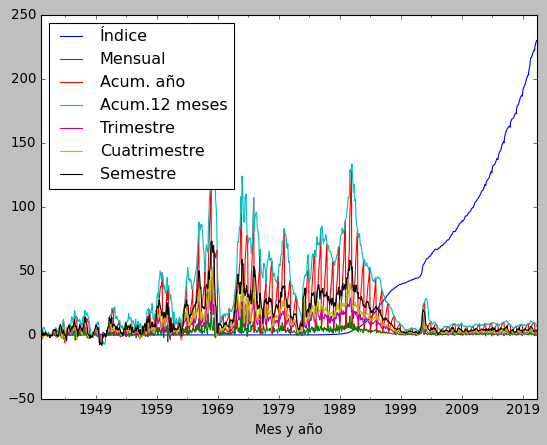

In [34]:
ipc.plot()

<Axes: xlabel='Mes y año'>

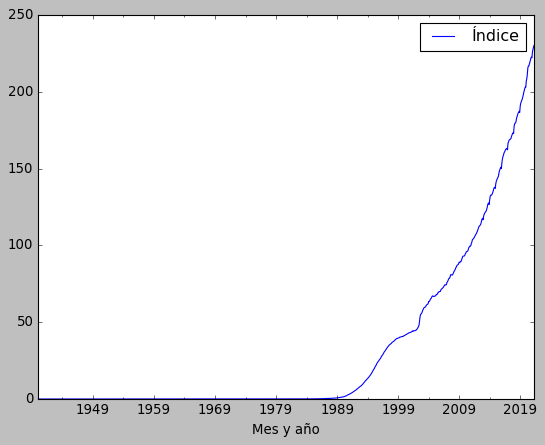

In [35]:
ipc.plot( y = 'Índice')

<Axes: xlabel='Mes y año'>

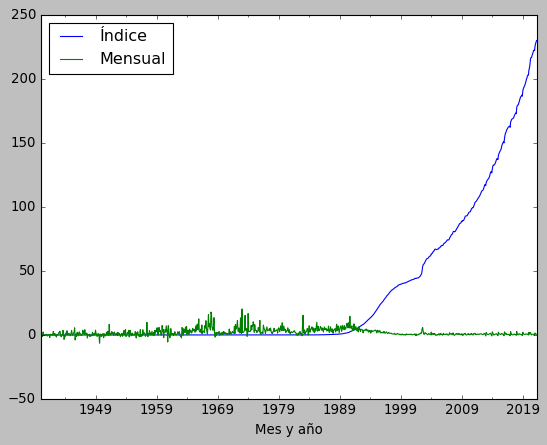

In [36]:
ipc.plot( y = ['Índice', 'Mensual'])

In [37]:
plt.style.available # estilos de la libreria 

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [38]:
plt.style.use('fivethirtyeight')

<Axes: xlabel='Mes y año'>

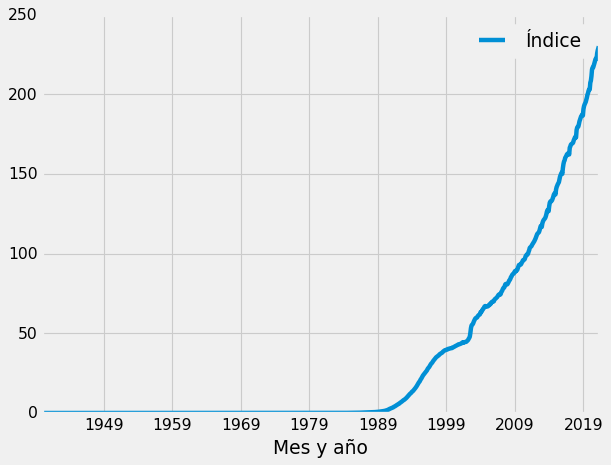

In [39]:
ipc.plot(y='Índice')

<Axes: xlabel='Mes y año'>

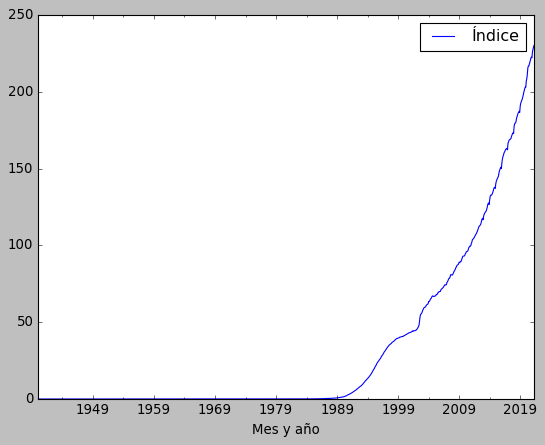

In [40]:
plt.style.use('classic')
ipc.plot(y='Índice')

<Axes: xlabel='Mes y año'>

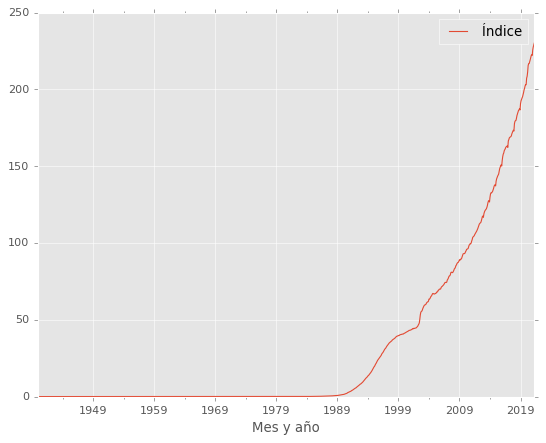

In [41]:
plt.style.use('ggplot')
ipc.plot(y='Índice')

In [42]:
import numpy as np
ipc["Resultado"] = np.where(ipc["Mensual"] > 0, "Positivo", 
                            np.where(ipc["Mensual"] < 0, "Negativo",
                                     "Cero"))

In [43]:
ipc[["Mensual", "Resultado"]]

,Mensual,Resultado
Mes y año,,
1940-01-01,-1.408451,Negativo
1940-02-01,0.000000,Cero
1940-03-01,0.571429,Positivo
1940-04-01,-0.568182,Negativo
1940-05-01,-1.142857,Negativo
...,...,...
2020-12-01,-0.190000,Negativo
2021-01-01,1.600000,Positivo
2021-02-01,0.820000,Positivo


In [44]:
ipc["Resultado"].value_counts()

Positivo    848
Negativo     99
Cero         29
Name: Resultado, dtype: int64

<Axes: >

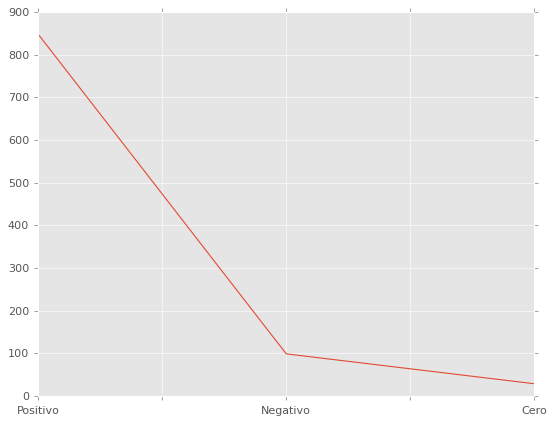

In [45]:
ipc["Resultado"].value_counts().plot()

<Axes: >

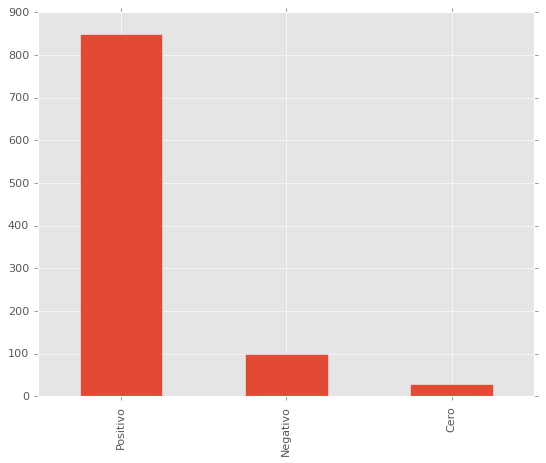

In [46]:
ipc["Resultado"].value_counts().plot(kind = "bar")

<Axes: >

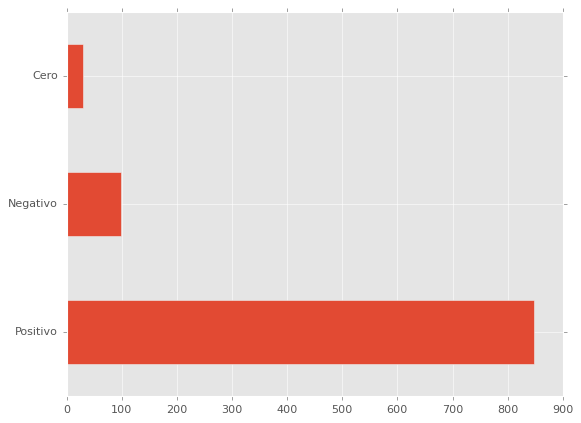

In [47]:
ipc["Resultado"].value_counts().plot(kind = "barh")

In [48]:
media_ipc = ipc["Mensual"].mean()

def sobre_promedio(mensual):
  if mensual >= media_ipc:
    return "Sobre el promedio"
  else:
    return "Bajo el promedio"

ipc["Mensual"].apply(sobre_promedio).value_counts()

Bajo el promedio     605
Sobre el promedio    371
Name: Mensual, dtype: int64

<Axes: ylabel='Mensual'>

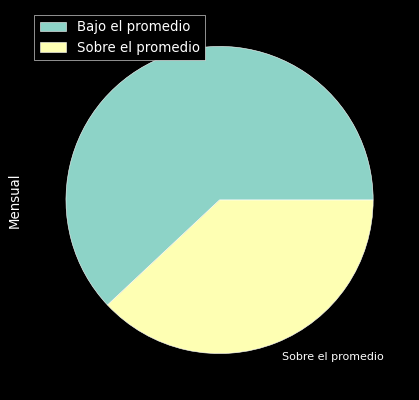

In [49]:
plt.style.use("dark_background")
ipc["Mensual"].apply(sobre_promedio).value_counts().plot( kind = 'pie', legend = True, )

# Graficos avanzados 

### Agregamos titulo, nombre a los ejes y leyendas 

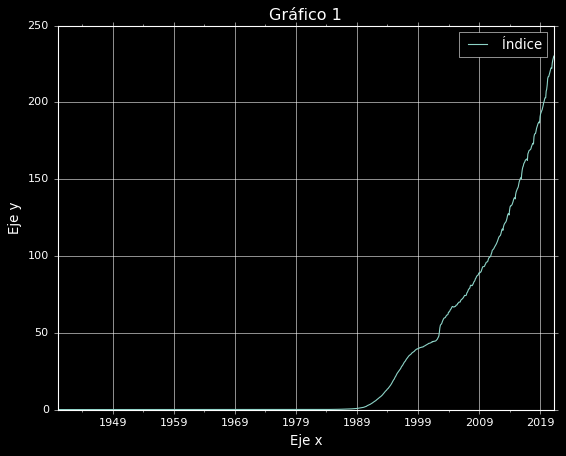

In [50]:
ipc.plot( y = 'Índice')
plt.title("Gráfico 1")
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.legend()

### Ejemplo Histograma

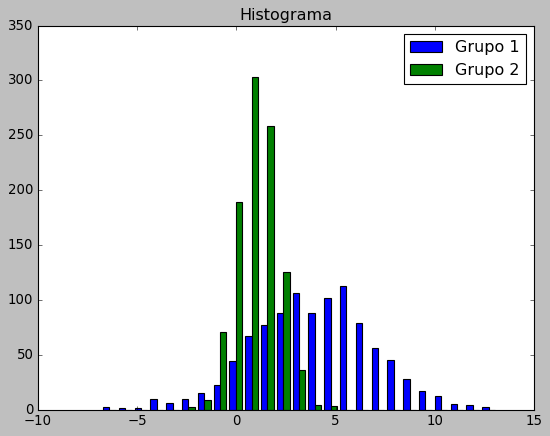

In [51]:
plt.style.use('classic')
x1 = np.random.normal(4,3,1000)
x2 = np.random.normal(1,1,1000)
plt.hist((x1,x2), bins=25, label=["Grupo 1", "Grupo 2"])
plt.title("Histograma")
plt.legend()

Text(0.5, 1.0, 'Histograma')

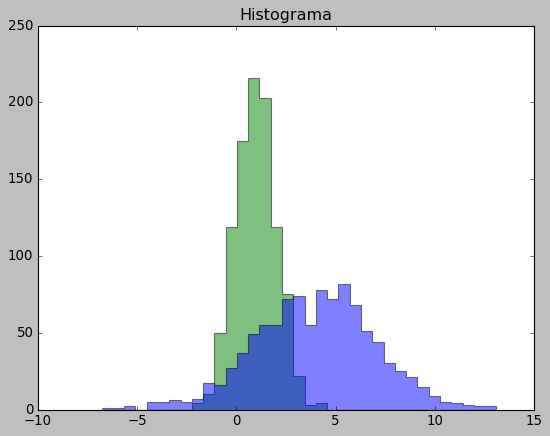

In [52]:
plt.hist((x1,x2), bins=35, histtype="stepfilled", alpha=0.5)
plt.title("Histograma")

El parámetro alpha=0.5 indica que los histogramas tendrán una transparencia del 50%. Esto significa que, cuando se superpongan, se podrán ver a través de ellos ligeramente, lo que puede ayudar a distinguir las áreas donde los histogramas se solapan.

# Libreria seaborn 

In [53]:
import seaborn as sns

In [54]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Diagrama de dispersion

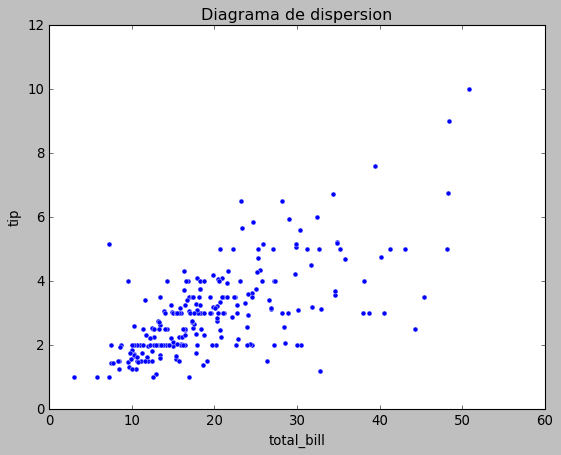

In [55]:
sns.scatterplot(data=tips, x="total_bill", y="tip")
plt.title("Diagrama de dispersion")
plt.show()

### Boxplot

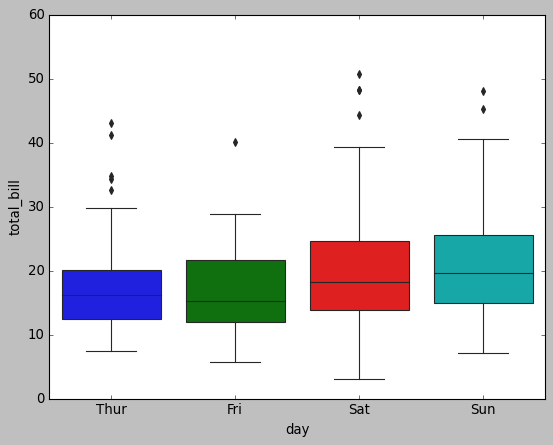

In [56]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)